# pre

## imports

In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import sklearn
import scanpy.external as sce

## settings

In [2]:
sc.settings.verbosity = 1             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3))

scanpy==1.4.6 anndata==0.7.1 umap==0.3.10 numpy==1.16.2 scipy==1.4.1 pandas==0.23.4 scikit-learn==0.22.1 statsmodels==0.11.0 python-igraph==0.7.1 louvain==0.6.1


## functions

# test

## PBMC

### data

In [3]:
adata_ref = sc.datasets.pbmc3k_processed()  # this is an earlier version of the dataset from the pbmc3k tutorial
adata = sc.datasets.pbmc68k_reduced()

In [4]:
var_names = adata_ref.var_names.intersection(adata.var_names)
adata_ref = adata_ref[:,var_names]
adata = adata[:,var_names]

### SAM test

In [6]:
adata_ref.X

ArrayView([[-0.17146951, -0.34178796, -0.4533926 , ..., -0.5212293 ,
            -0.2090951 , -0.5312034 ],
           [-0.21458222, -0.5419136 ,  0.9255181 , ..., -0.8571637 ,
            -0.31314576, -0.5966544 ],
           [-0.37688747, -0.50079846,  1.9080331 , ..., -0.5907208 ,
            -0.17087643,  1.379     ],
           ...,
           [-0.2070895 , -0.30775595, -0.28381926, ...,  2.2641735 ,
            -0.16106427,  2.0414972 ],
           [-0.19032837, -0.2516772 , -0.16154155, ..., -0.32582405,
            -0.13521303, -0.48211113],
           [-0.33378917, -0.39517227, -0.26497108, ..., -0.43687984,
            -0.13032717, -0.4713379 ]], dtype=float32)

### ingest

In [6]:
adata_concat = adata_ref.concatenate(adata)

In [9]:
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)

In [130]:
adata_ref.shape

(2638, 208)

In [128]:
sc.tl.louvain(adata)

AnnData object with n_obs × n_vars = 700 × 208 
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'rep'
    varm: 'PCs'

In [15]:
sc.pp.scale(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

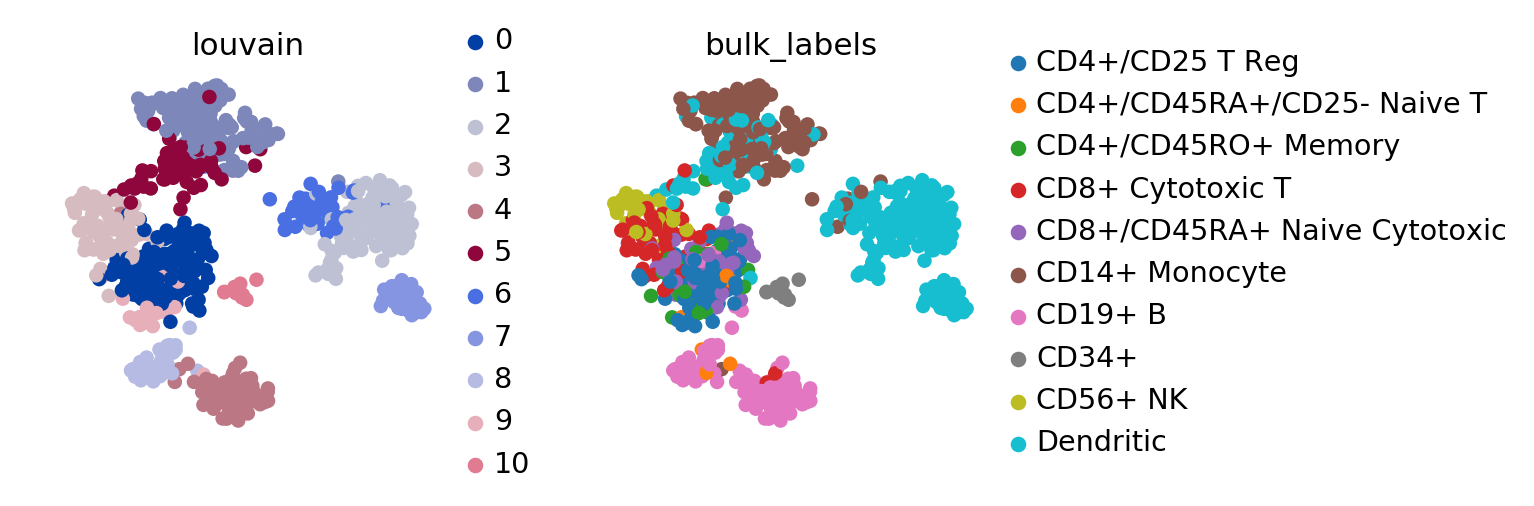

In [25]:
sc.pl.umap(adata, color=['louvain','bulk_labels'])

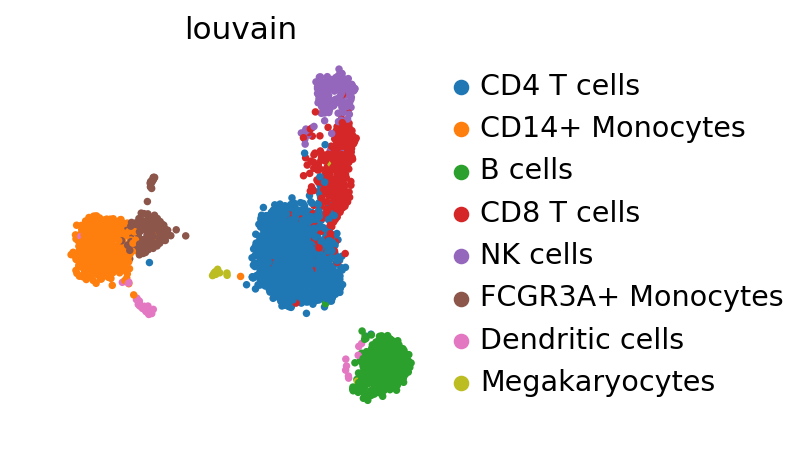

In [10]:
sc.pl.umap(adata_ref, color='louvain')

In [17]:
sc.pp.scale(adata_concat)
sc.pp.pca(adata_concat)
sc.pp.neighbors(adata_concat)
sc.tl.umap(adata_concat)

In [26]:
adata_concat

AnnData object with n_obs × n_vars = 3338 × 208 
    obs: 'G2M_score', 'S_score', 'batch', 'bulk_labels', 'louvain', 'n_counts', 'n_genes', 'percent_mito', 'phase'
    var: 'n_cells-0', 'n_counts-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'highly_variable-1'
    uns: 'pca', 'neighbors', 'umap', 'louvain_colors', 'batch_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

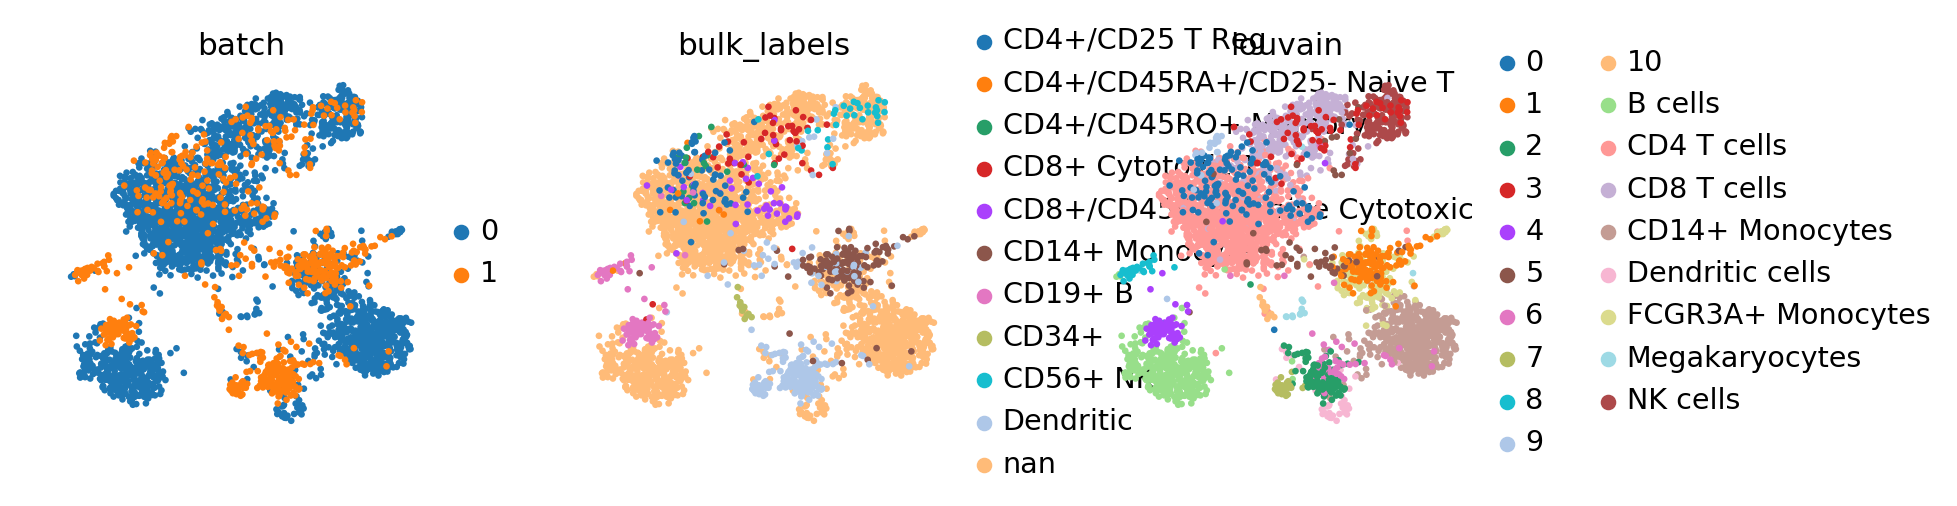

In [32]:
sc.pl.umap(adata_concat, color=['batch','bulk_labels','louvain'])

In [41]:
adata

View of AnnData object with n_obs × n_vars = 700 × 208 
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [40]:
adata_ref

View of AnnData object with n_obs × n_vars = 2638 × 208 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'

In [42]:
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)

In [43]:
sc.tl.ingest(adata, adata_ref, obs='louvain')

/home/yzy/anaconda3/envs/pytorch/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../anaconda3/envs/pytorch/lib/python3.7/site-packages/umap/nndescent.py", line 124:
    @numba.njit(parallel=True)
    def init_from_random(n_neighbors, data, query_points, heap, rng_state):
    ^

  state.func_ir.loc))


In [44]:
adata.uns['louvain_colors'] = adata_ref.uns['louvain_colors']  # fix colors

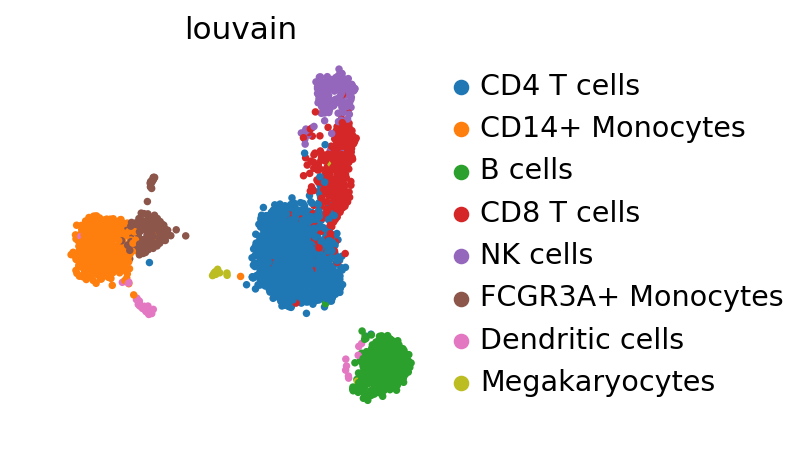

In [47]:
sc.pl.umap(adata_ref, color=['louvain'], wspace=0.5)

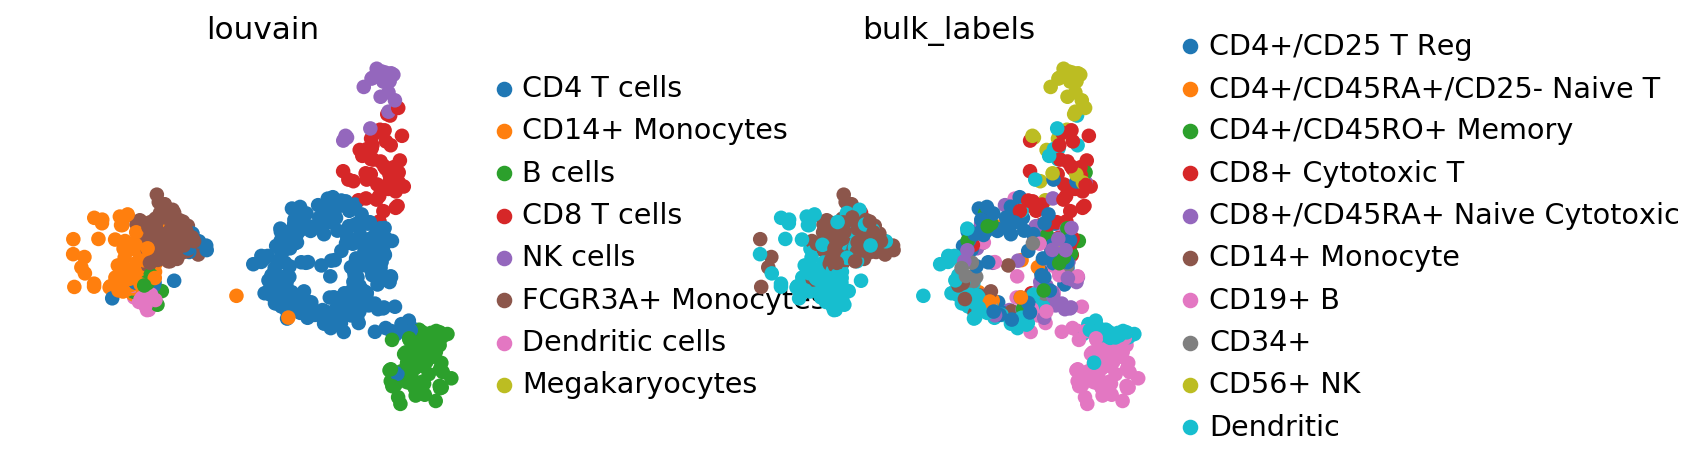

In [45]:
sc.pl.umap(adata, color=['louvain', 'bulk_labels'], wspace=0.5)

In [62]:
adata_concat = adata_ref.concatenate(adata, batch_categories=['ref', 'new'])

In [74]:
adata

View of AnnData object with n_obs × n_vars = 700 × 208 
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [75]:
np.unique(adata.obs.louvain)

array(['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9'],
      dtype=object)

In [79]:
np.unique(adata_concat.obs.louvain)

array(['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9', 'B cells',
       'CD14+ Monocytes', 'CD4 T cells', 'CD8 T cells', 'Dendritic cells',
       'FCGR3A+ Monocytes', 'Megakaryocytes', 'NK cells'], dtype=object)

In [54]:
adata_concat

AnnData object with n_obs × n_vars = 3338 × 208 
    obs: 'G2M_score', 'S_score', 'batch', 'bulk_labels', 'louvain', 'n_counts', 'n_genes', 'percent_mito', 'phase'
    var: 'n_cells-ref', 'n_counts-new', 'means-new', 'dispersions-new', 'dispersions_norm-new', 'highly_variable-new'
    uns: 'louvain_colors'

In [77]:
adata_concat = adata_ref.concatenate(adata, batch_categories=['ref', 'new'])

In [78]:
adata_concat

AnnData object with n_obs × n_vars = 3338 × 208 
    obs: 'G2M_score', 'S_score', 'batch', 'bulk_labels', 'louvain', 'n_counts', 'n_genes', 'percent_mito', 'phase'
    var: 'n_cells-ref', 'n_counts-new', 'means-new', 'dispersions-new', 'dispersions_norm-new', 'highly_variable-new'

In [81]:
np.unique(adata_concat.obs.louvain)

array(['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9', 'B cells',
       'CD14+ Monocytes', 'CD4 T cells', 'CD8 T cells', 'Dendritic cells',
       'FCGR3A+ Monocytes', 'Megakaryocytes', 'NK cells'], dtype=object)

In [83]:
adata_ref

View of AnnData object with n_obs × n_vars = 2638 × 208 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'

In [84]:
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)

In [85]:
adata_ref

AnnData object with n_obs × n_vars = 2638 × 208 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'

In [89]:
adata

AnnData object with n_obs × n_vars = 700 × 208 
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'rep'
    varm: 'PCs'

In [92]:
adata

AnnData object with n_obs × n_vars = 700 × 208 
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'rep'
    varm: 'PCs'

In [91]:
np.unique(adata.obs.louvain)

array(['B cells', 'CD14+ Monocytes', 'CD4 T cells', 'CD8 T cells',
       'Dendritic cells', 'FCGR3A+ Monocytes', 'NK cells'], dtype=object)

In [86]:
# 执行之前，ref必须有uns.umap
# 执行之后，adata的obs，用ref的obs了
sc.tl.ingest(adata, adata_ref, obs='louvain')

/home/yzy/anaconda3/envs/pytorch/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../anaconda3/envs/pytorch/lib/python3.7/site-packages/umap/nndescent.py", line 124:
    @numba.njit(parallel=True)
    def init_from_random(n_neighbors, data, query_points, heap, rng_state):
    ^

  state.func_ir.loc))


In [93]:
adata_concat = adata_ref.concatenate(adata, batch_categories=['ref', 'new'])

In [94]:
adata_concat

AnnData object with n_obs × n_vars = 3338 × 208 
    obs: 'G2M_score', 'S_score', 'batch', 'bulk_labels', 'louvain', 'n_counts', 'n_genes', 'percent_mito', 'phase'
    var: 'n_cells-ref', 'n_counts-new', 'means-new', 'dispersions-new', 'dispersions_norm-new', 'highly_variable-new'

In [95]:
adata_concat.obs.louvain = adata_concat.obs.louvain.astype('category')
adata_concat.obs.louvain.cat.reorder_categories(adata_ref.obs.louvain.cat.categories, inplace=True)  # fix category ordering
adata_concat.uns['louvain_colors'] = adata_ref.uns['louvain_colors']  # fix category colors

In [96]:
sc.pl.umap(adata_concat, color=['batch', 'louvain'])

... storing 'bulk_labels' as categorical
... storing 'phase' as categorical


KeyError: "Could not find entry in `obsm` for 'umap'.\nAvailable keys are: []."

In [56]:
sc.external.pp.bbknn(adata_concat, batch_key='batch')  # running bbknn 1.3.6

In [57]:
sc.tl.umap(adata_concat)

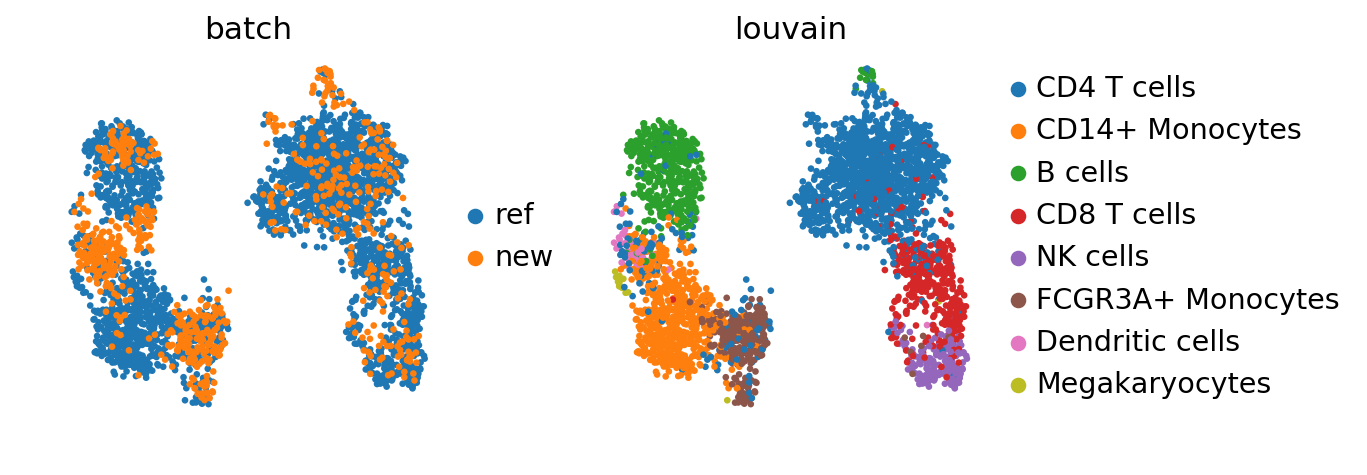

In [58]:
sc.pl.umap(adata_concat, color=['batch', 'louvain'])

### bbknn

In [97]:
sc.tl.pca(adata_concat)

In [98]:
sc.external.pp.bbknn(adata_concat, batch_key='batch')  # running bbknn 1.3.6

In [99]:
sc.tl.umap(adata_concat)

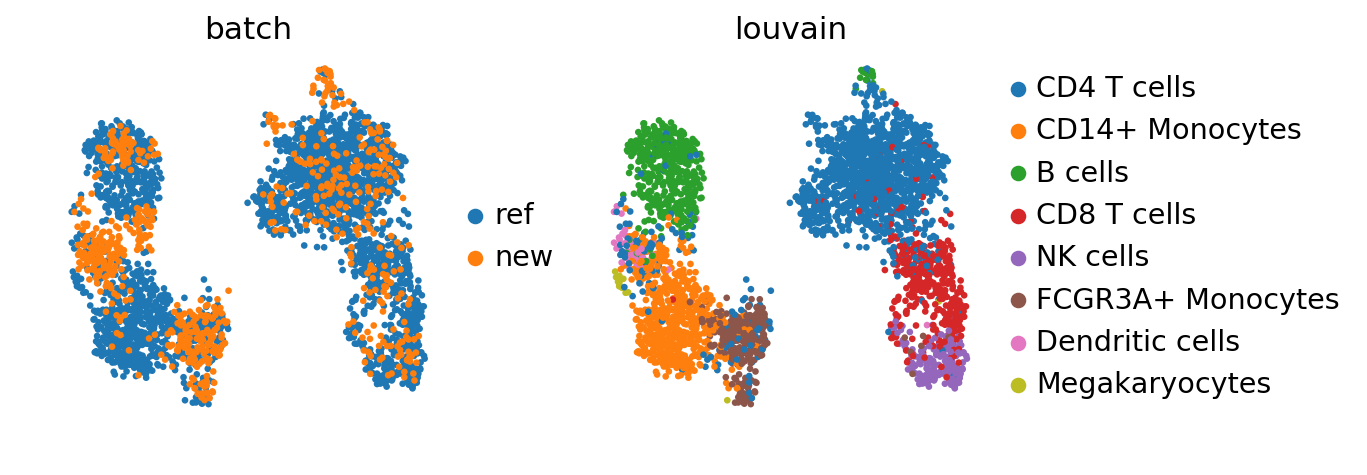

In [100]:
sc.pl.umap(adata_concat, color=['batch', 'louvain'])

### scanorama

In [101]:
adata_list_scanorama = [adata_ref,adata]
import scanorama

# # Integration.
# integrated = scanorama.integrate_scanpy(adata_list_scanorama)

# # Batch correction.
# corrected = scanorama.correct_scanpy(adata_list)

# Integration and batch correction.
integrated, corrected = scanorama.correct_scanpy(adata_list_scanorama, return_dimred=True)

/home/yzy/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Found 208 genes among all datasets
[[0.         0.99142857]
 [0.         0.        ]]
Processing datasets (0, 1)


In [102]:
adata_concat_scanorama = corrected[0].concatenate(corrected[1:])

In [105]:
sc.pp.pca(adata_concat_scanorama)
sc.pp.neighbors(adata_concat_scanorama)
sc.tl.umap(adata_concat_scanorama)
sc.tl.leiden(adata_concat_scanorama)

In [125]:
adata_concat_scanorama.obs['louvain'] = np.array(adata_concat.obs.louvain)
adata_concat_scanorama.obs['louvain'] = adata_concat_scanorama.obs['louvain'].astype('category')
adata_concat_scanorama.uns['louvain_colors'] = adata_concat.uns['louvain_colors']  # fix category colors

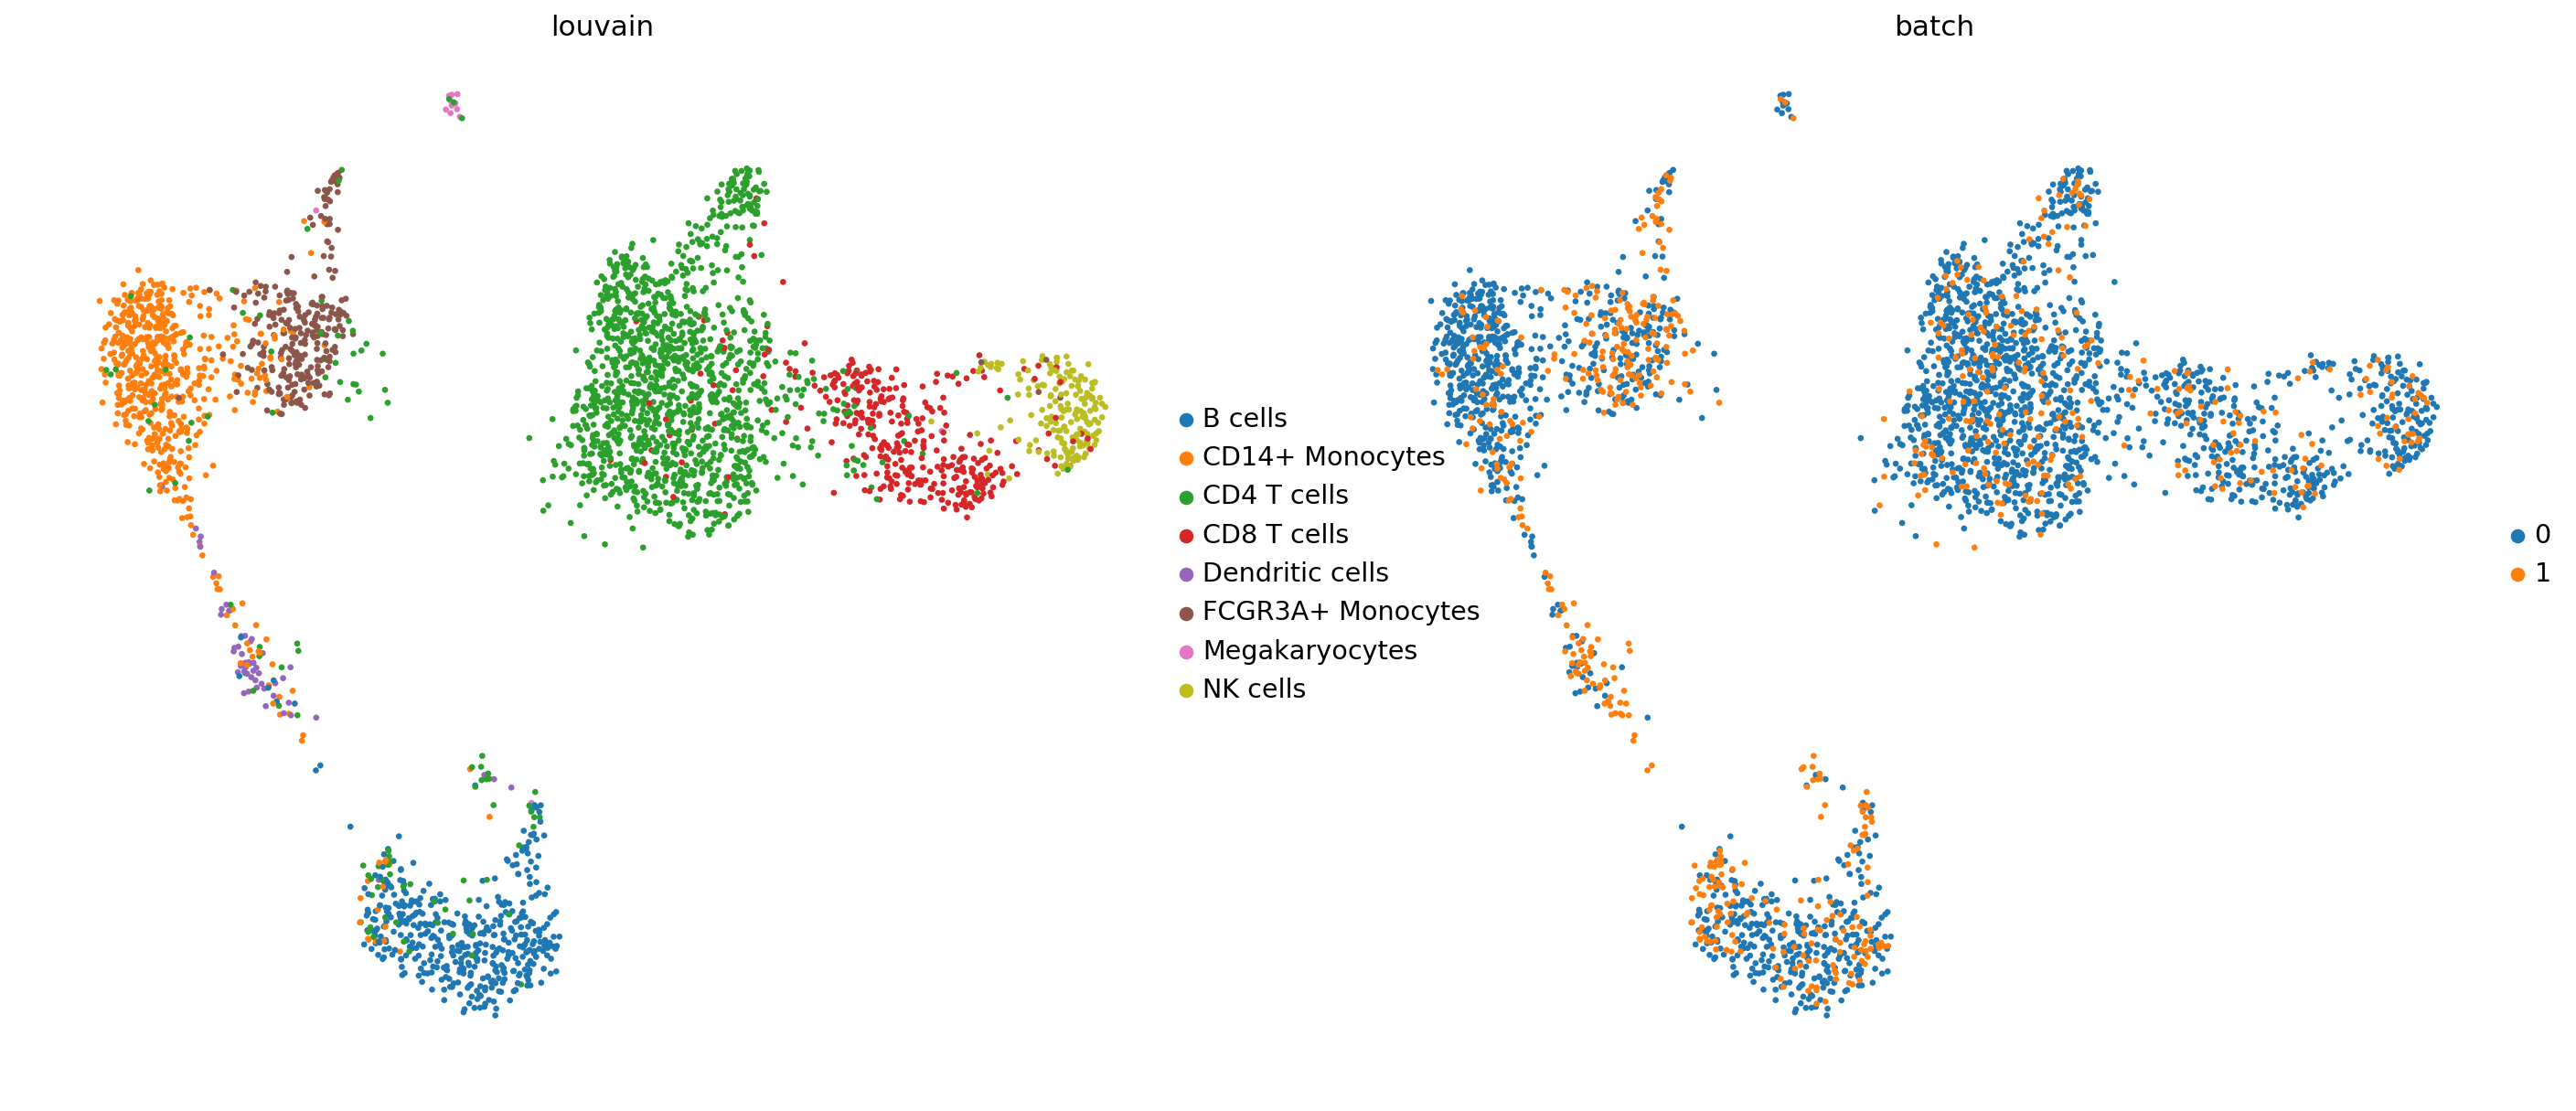

In [127]:
sc.pl.umap(adata_concat_scanorama,color=['louvain','batch'])

### gene graph based clustering

In [133]:
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)

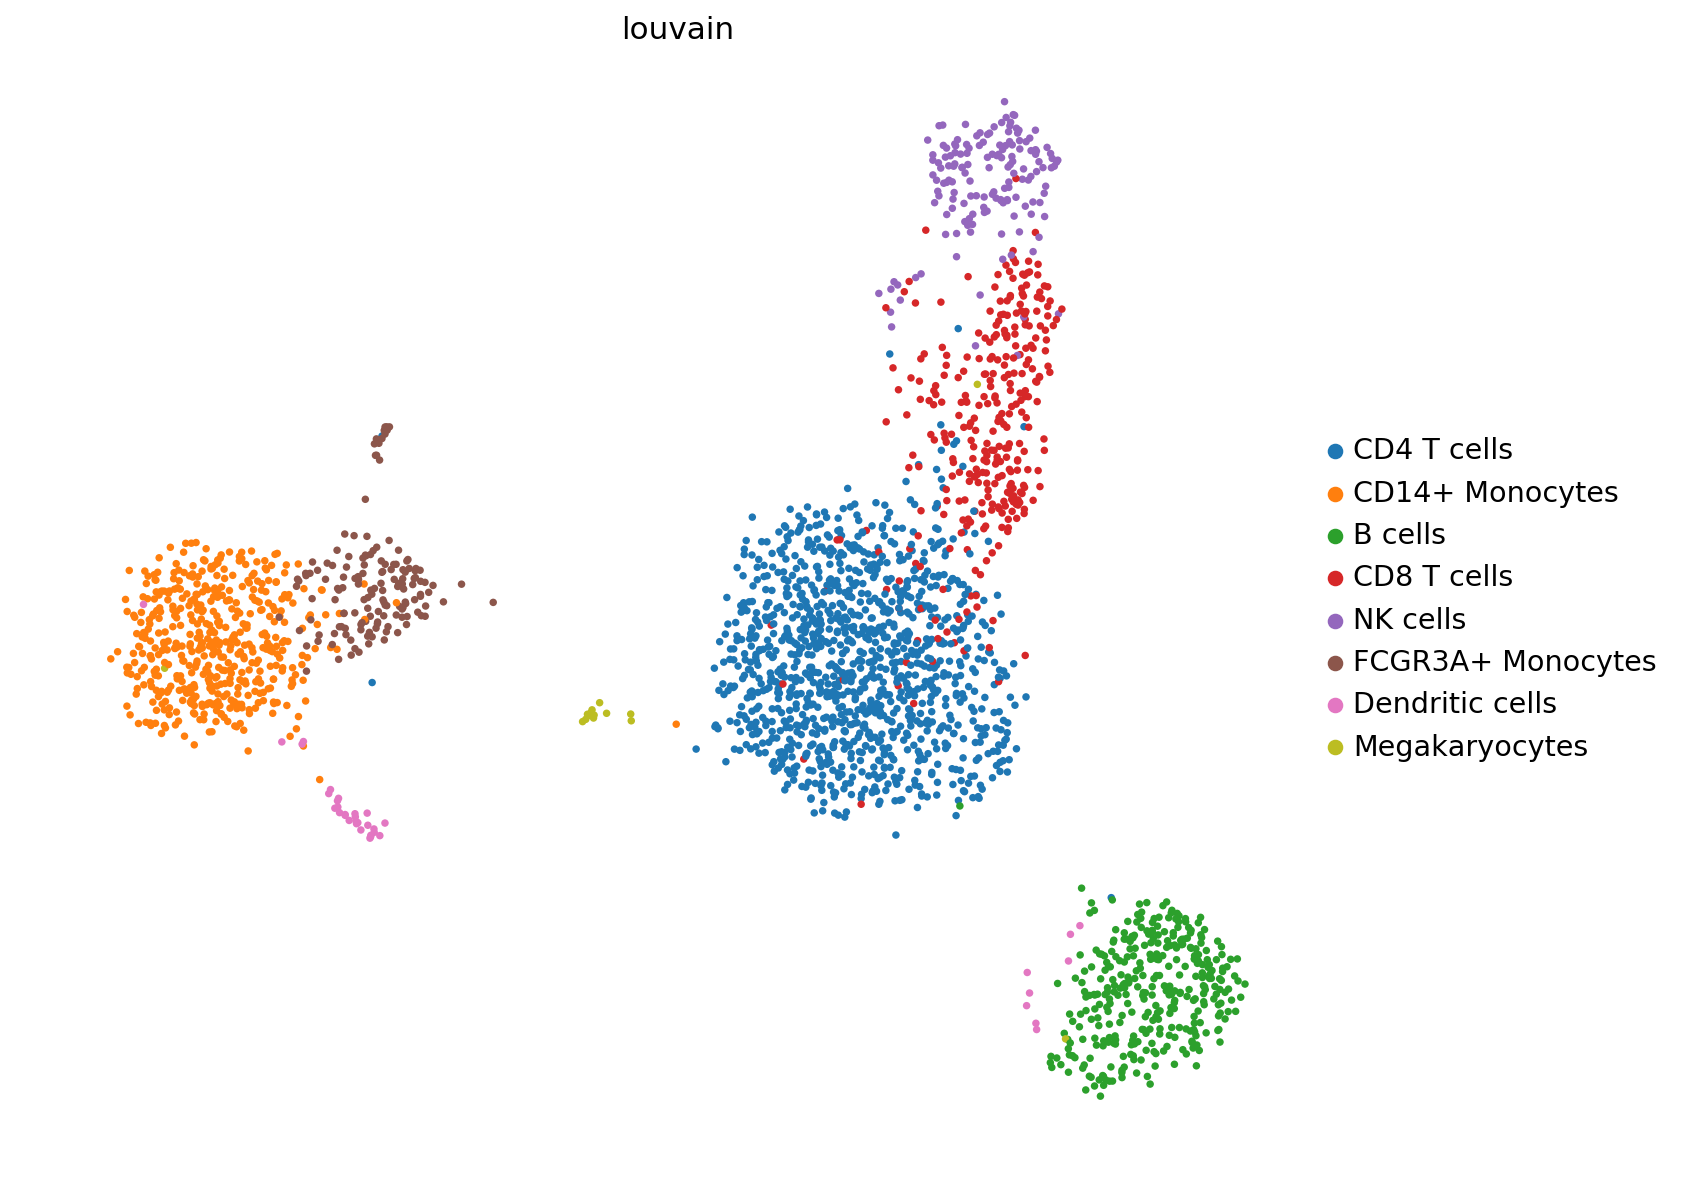

In [134]:
sc.pl.umap(adata_ref, color='louvain')

In [135]:
sc.tl.ingest(adata, adata_ref, obs='louvain')

/home/yzy/anaconda3/envs/pytorch/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../anaconda3/envs/pytorch/lib/python3.7/site-packages/umap/nndescent.py", line 124:
    @numba.njit(parallel=True)
    def init_from_random(n_neighbors, data, query_points, heap, rng_state):
    ^

  state.func_ir.loc))


In [136]:
adata.uns['louvain_colors'] = adata_ref.uns['louvain_colors']  # fix colors

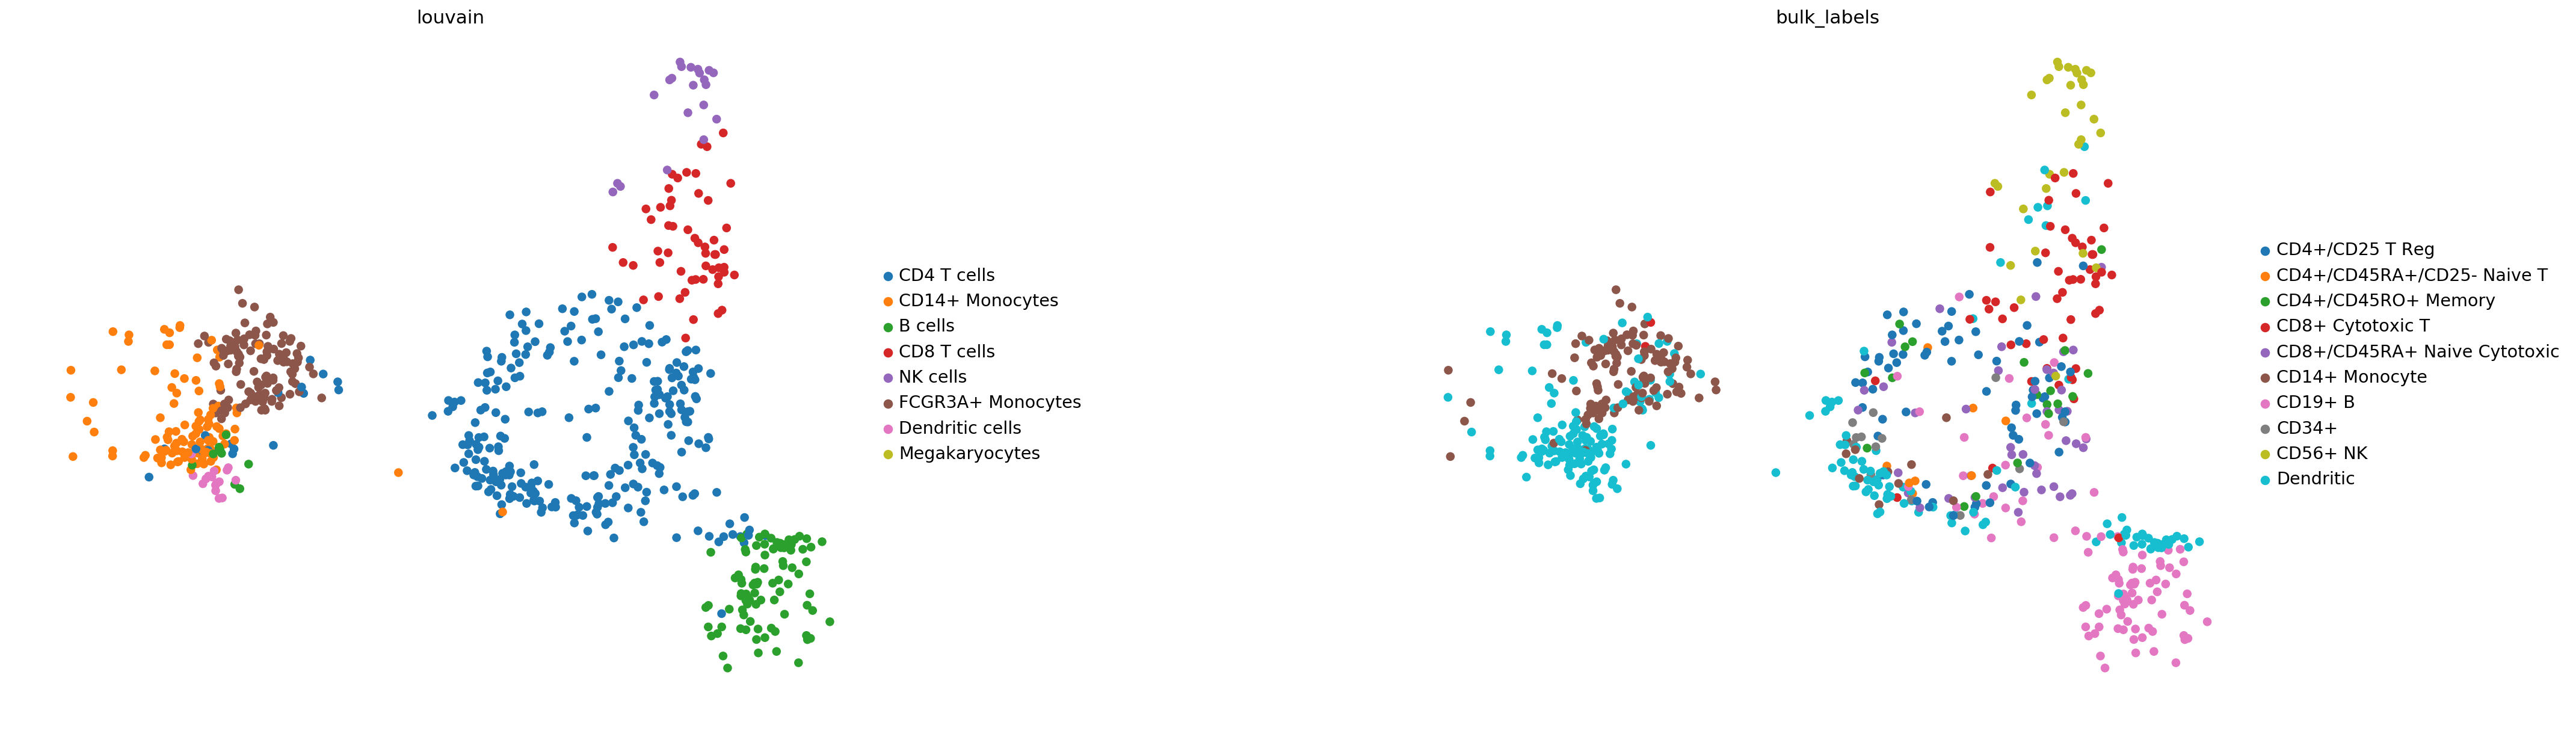

In [137]:
sc.pl.umap(adata, color=['louvain', 'bulk_labels'], wspace=0.5)

In [142]:
sc.tl.leiden(adata_ref,resolution=10)

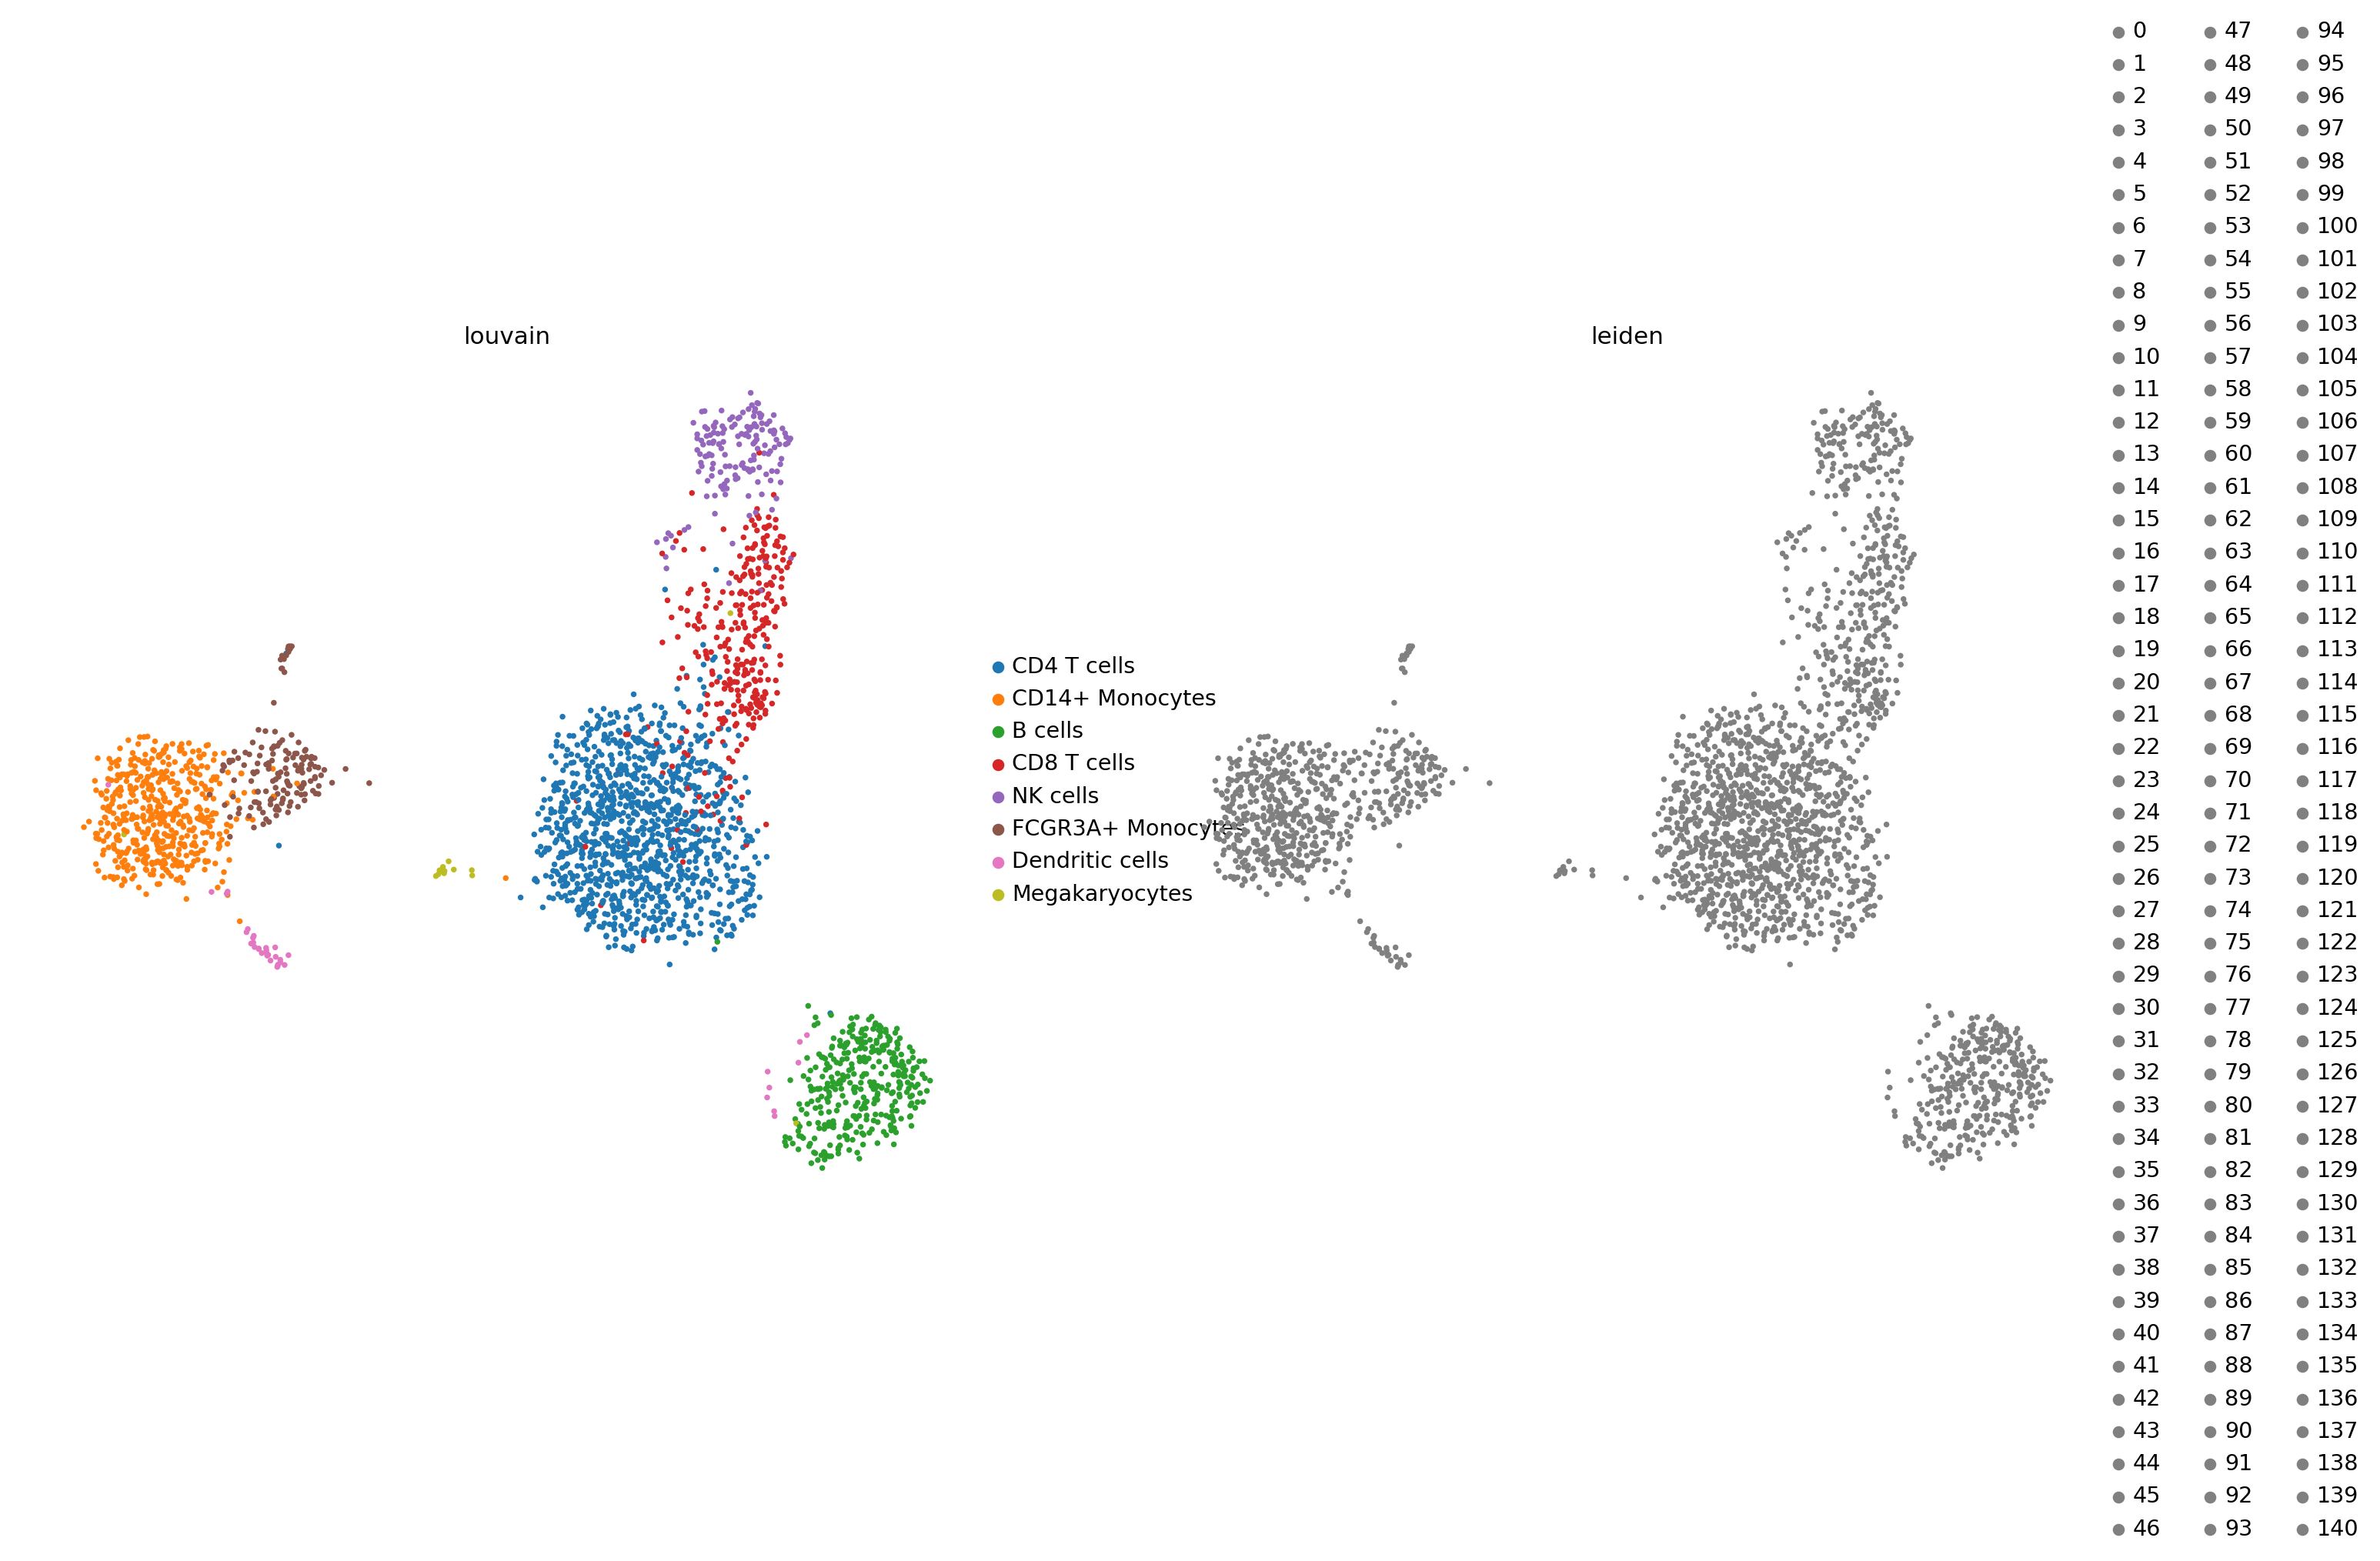

In [143]:
sc.pl.umap(adata_ref,color=['louvain','leiden'])

In [205]:
sc.tl.leiden(adata,resolution=10)

In [239]:
np.unique(adata.obs['leiden'],return_counts=1)

(array(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
        '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28',
        '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38',
        '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48',
        '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58',
        '59', '6', '7', '8', '9'], dtype=object),
 array([28, 25, 16, 16, 16, 16, 15, 15, 15, 15, 14, 14, 21, 14, 13, 13, 13,
        13, 12, 12, 12, 12, 12, 20, 12, 11, 11, 10, 10, 10,  9,  9,  9,  9,
        19,  9,  9,  9,  8,  7,  7,  6,  6,  6,  6, 19,  6,  6,  5,  5,  5,
         4,  4,  4,  3,  3, 19, 19, 17, 17]))

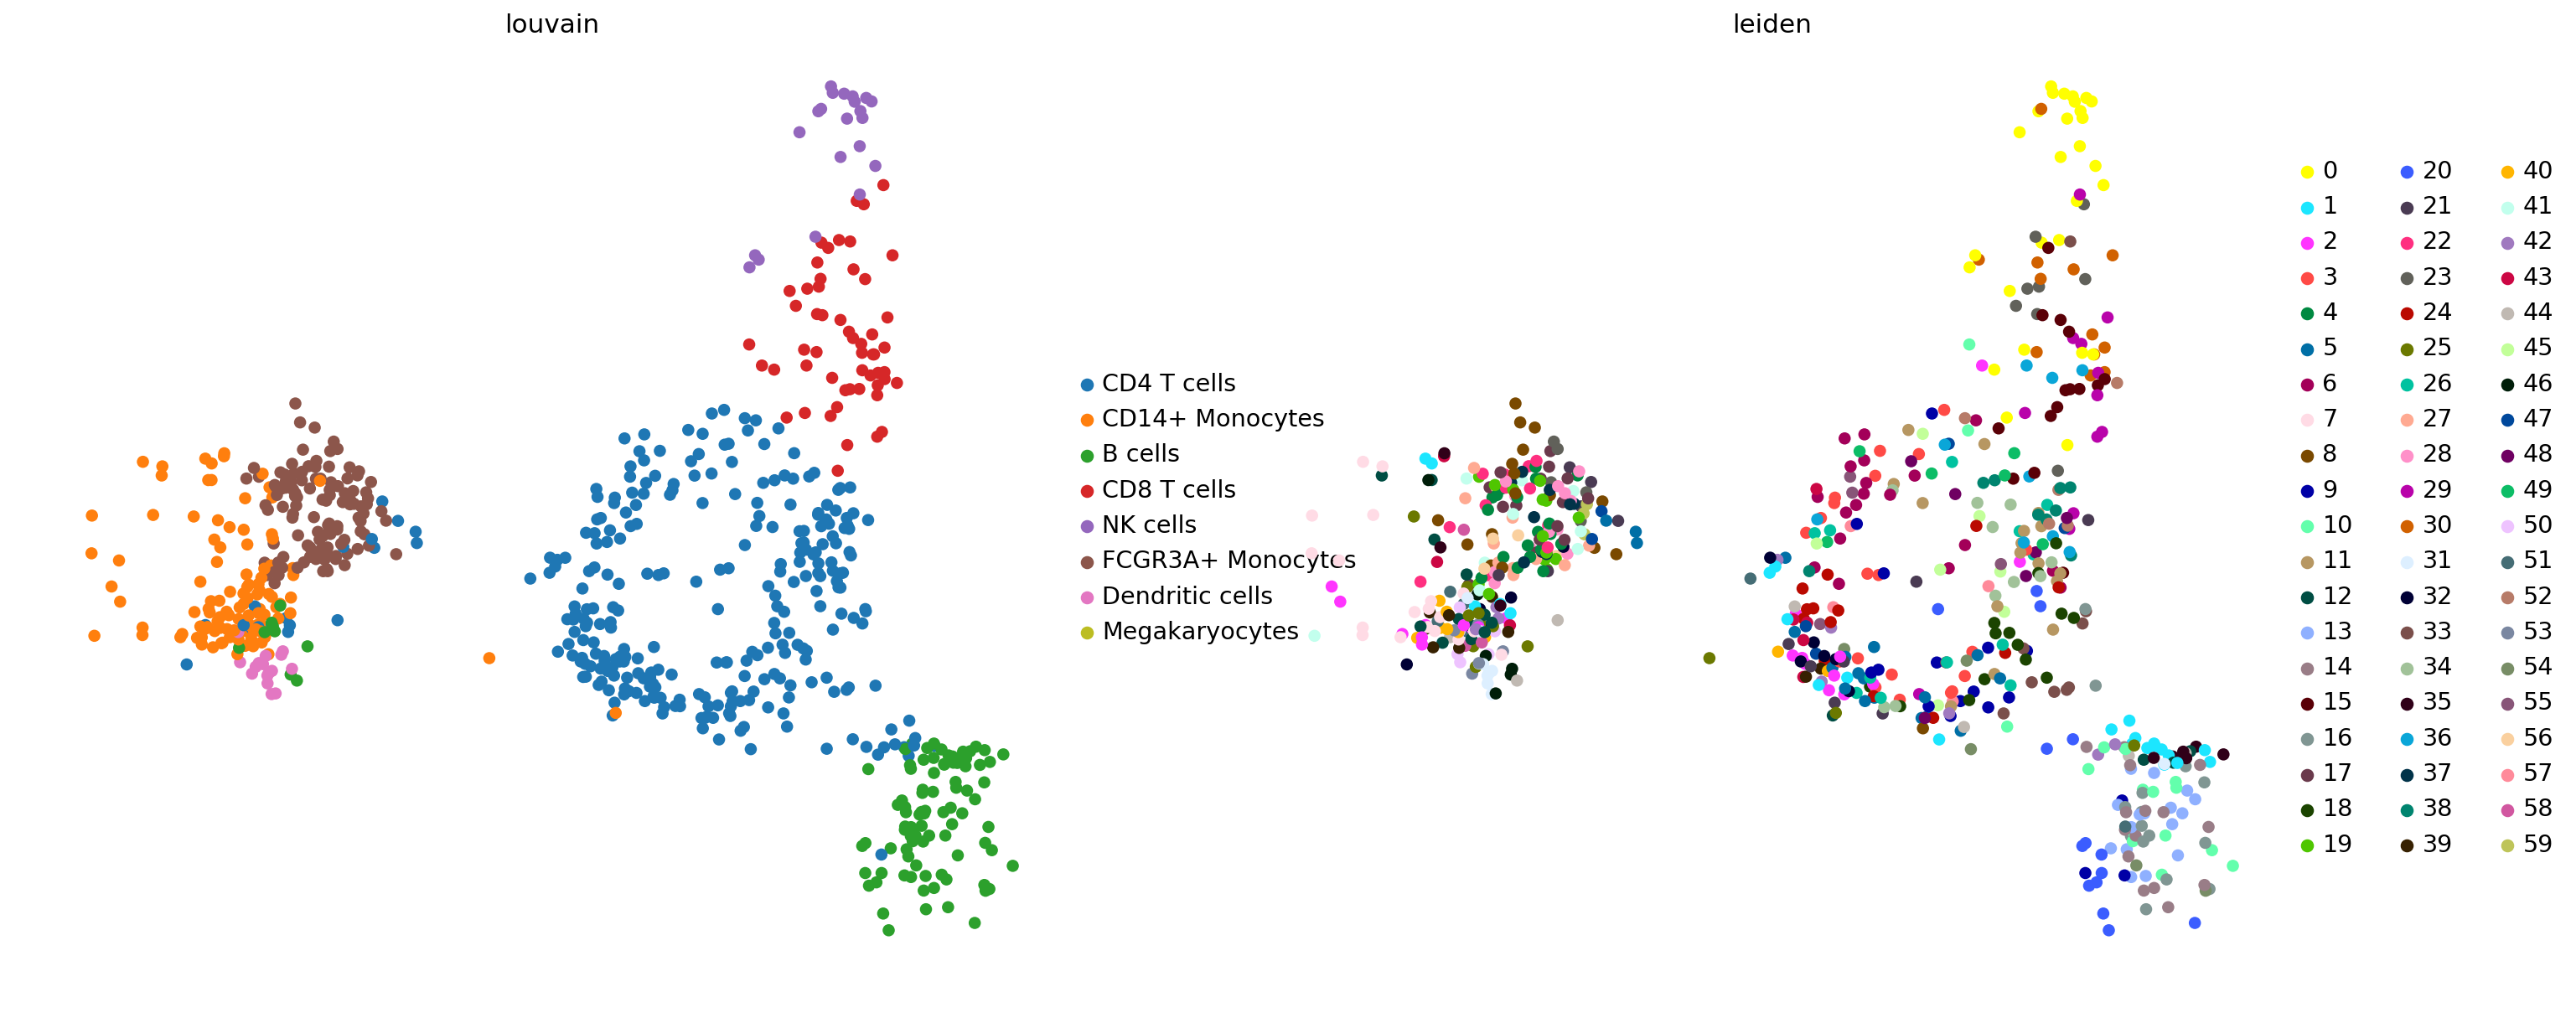

In [206]:
sc.pl.umap(adata,color=['louvain','leiden'])

In [207]:
leiden_cls_ref = np.unique(adata_ref.obs.leiden)
adataset_list_ref = [adata_ref[adata_ref.obs['leiden']==leiden_idx,:] for leiden_idx in leiden_cls_ref]

In [208]:
leiden_cls = np.unique(adata.obs.leiden)
adataset_list = [adata[adata.obs['leiden']==leiden_idx,:] for leiden_idx in leiden_cls]

In [212]:
len(adataset_list)

60

In [213]:
len(adataset_list_ref)

141

In [214]:
adataset_list.extend(adataset_list_ref)

In [215]:
len(adataset_list)

201

In [164]:
tmp= np.array(adataset_list[2].obs['louvain'])
import scipy
scipy.stats.mode(tmp)[0][0]

'CD8 T cells'

In [219]:
cellset_mat_list = [np.array(ad.X) for ad in adataset_list]
cellset_label_list = [scipy.stats.mode(np.array(ad.obs['louvain']))[0][0] for ad in adataset_list]
batch_list = np.zeros(shape=(len(adataset_list),))
batch_list[60:] = 1

In [235]:
genegraph_list = []
genenx_list = []
for cellset in cellset_mat_list:
    cur_graph = sklearn.neighbors.kneighbors_graph(X=np.transpose(cellset),n_neighbors=10,metric='correlation')
    G = nx.from_scipy_sparse_matrix(cur_graph)
    genegraph_list.append(cur_graph)
    genenx_list.append(G)

In [199]:
import networkx as nx
import umap
import matplotlib.pyplot as plt

In [195]:
np.sum(np.abs(genegraph_list[0]-genegraph_list[2]))

2486.0

In [236]:
graph_dist = np.zeros(shape=(len(cellset_label_list),len(cellset_label_list)))
for i in range(len(genegraph_list)):
    for j in range(len(genegraph_list)):
        g_i = genegraph_list[i]
        g_j = genegraph_list[j]
#         cur_dist = nx.algorithms.similarity.graph_edit_distance(g_i,g_j)
        cur_dist = np.sum(np.abs(g_i-g_j))
        graph_dist[i,j] = cur_dist
#         print(i,j,cur_dist)
        

In [237]:
embedding = umap.UMAP(metric='precomputed').fit_transform(graph_dist)

/home/yzy/anaconda3/envs/pytorch/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


In [223]:
unique_labels = np.unique(cellset_label_list)
cellset_labelid_list = [np.where(unique_labels==l)[0][0] for l in cellset_label_list]

In [227]:
axes[1]

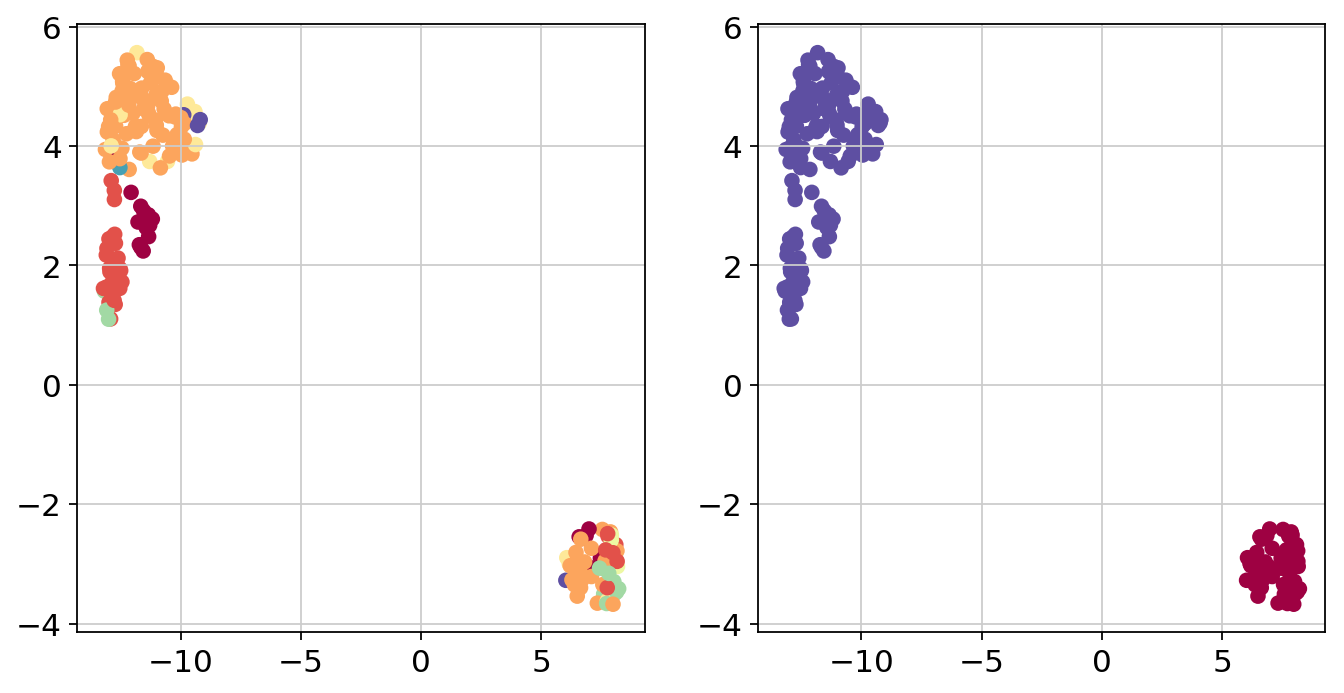

In [238]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].scatter(embedding[:,0],embedding[:,1],c=cellset_labelid_list,cmap = 'Spectral')
axes[1].scatter(embedding[:,0],embedding[:,1],c=batch_list,cmap = 'Spectral')

In [144]:
cellset_mat_list = []
cellset_label_list = []
# num
for i in range(adata_ref.shape[0]):
    cur_louvain = adata_ref[i]

(array(['0', '1', '10', '100', '101', '102', '103', '104', '105', '106',
        '107', '108', '109', '11', '110', '111', '112', '113', '114',
        '115', '116', '117', '118', '119', '12', '120', '121', '122',
        '123', '124', '125', '126', '127', '128', '129', '13', '130',
        '131', '132', '133', '134', '135', '136', '137', '138', '139',
        '14', '140', '15', '16', '17', '18', '19', '2', '20', '21', '22',
        '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32',
        '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42',
        '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52',
        '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62',
        '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72',
        '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82',
        '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92',
        '93', '94', '95', '96', '97', '98', '99'], dtype=obje

## pancreas